<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [120]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [121]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

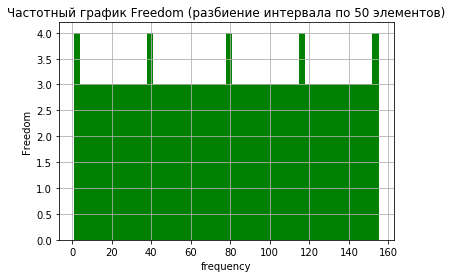

In [125]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Freedom'], 50, facecolor='g') 

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

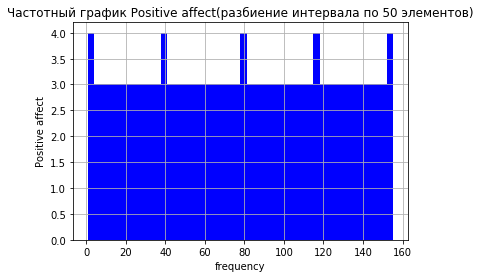

In [124]:
n, bins, patches = plt.hist(df['Positive affect'], 50, facecolor='b') 
plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect(разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

 Распределение Freedom и positive affect как я понимаю, по отдельности имеют Равномерное распределение.  

### Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [92]:
freedom = df['Freedom']
num_freedom = len(freedom)
sorted_freedom = sorted(freedom)
middle = (num_freedom//2)
if num_freedom%2==0:
    result = (sorted_freedom[middle-1]+sorted_freedom[middle])/2
else: 
    result = sorted_freedom[middle]
print('Медиана: ', result)

Медиана:  71.0


In [93]:
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  71.0


In [94]:
# в нашем случае мат ожидание совпадает со средним значением 
statistics.mean(df['Freedom'])

# есть не корректное значение

nan

In [95]:
df[df['Freedom'].isnull()]
# это же значение является одним из выбросов

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [96]:
 # это одно значение, можем убрать его из расчетов, чтобы дальнейшие результаты не портило
df = df.loc[df['Ladder']!=29, :]

In [97]:
# в нашем случае мат ожидание совпадает со средним значением 

print(f"математическое ожидание - {statistics.mean(df['Freedom'])}")


математическое ожидание - 78.0


In [98]:
# стандартное отклонение
print(f"стандартное отклонение -' {statistics.pstdev(df['Freedom'])}")
#  получается 44,7% данных распросаны относительно среднего значения. 

стандартное отклонение -' 44.74371464239419


In [99]:
# Дисперсия это - квадрат стандартного отклонения

print(f"Дисперсия - {statistics.pstdev(df['Freedom'])**2}")

Дисперсия - 2002.0


In [100]:
statistics.pvariance(df['Freedom'])

2002.0

In [101]:
print('Минимальное значение Freedom: ', min(df['Freedom']))

Минимальное значение Freedom:  1.0


In [102]:
print('Максимальное значение Freedom: ', max(df['Freedom']))

Максимальное значение Freedom:  155.0


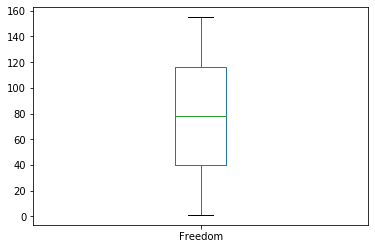

In [103]:
df['Freedom'].plot(kind='box')

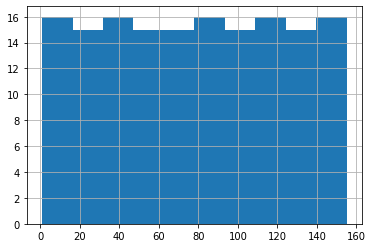

In [104]:
df['Freedom'].hist()

 Я думаю, здесь нет выбросов , несмотря на большой размах, но учитывая уникальность значений.

In [105]:
Freedom_range = max(df['Freedom']) - min(df['Freedom'])
print('Размах  Freedom -' ,Freedom_range)

Размах  Freedom - 154.0


### Почему нельзя найти моду?

In [106]:
len(df['Freedom'])

155

In [107]:
len(df['Freedom'].unique())

155

In [112]:
#print('Значение моды: ', statistics.mode(df['Freedom']))

 Потому что каждое значение в столбце Freedom уникально, оно не повторяется.  

### Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [28]:
from scipy.stats import pearsonr

In [29]:
len(df['Freedom'])

155

In [30]:
len(df['Positive affect'])
# имеют одинаковую длину

155

In [31]:
df[df['Positive affect'].isnull()]
# Freedom нулевых значений нет, это мы проверили раньше. И в Positive affect- нулевых значений нет

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy


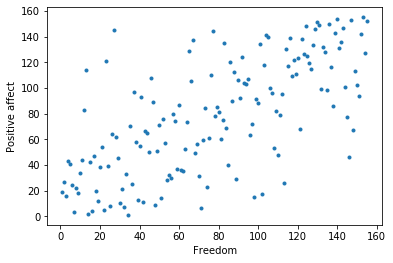

In [33]:
#ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')


x = df['Freedom']
y = df['Positive affect']

plt.scatter(x, y, marker='.')


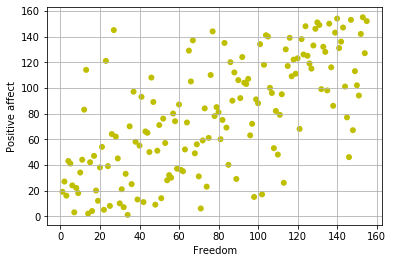

In [34]:

duration = df['Freedom']
year = df['Positive affect']

fig, ax = plt.subplots()
ax.scatter(duration, year, c='y', alpha= 1, edgecolors='none') 
ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.show()

In [35]:
# взаимосвязь линейная - это видно по графику - чем больше значение Freedom, тем выше параметры 'Positive affect
corr, p_value = pearsonr(x, y)
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: 0.6817698430601656


Коэффициент корреляции Пирсона 0.68,  что говорит о заметной корреляционной связи. 
Зависимость между Freedom и Positive affect прослеживается.
Знак Пирсона положительный - слабая прямая связь
с ростом значения одного параметра соответствующие значения другого параметра будет тоже расти. 

### Нормализовать данные колонки Freedom (централизация + масштабирование)

In [36]:
from sklearn import preprocessing

In [37]:
#Так как среднее значение не равно 0, необходимо нормализовать - централизовать.
statistics.mean(df['Freedom'])

78.0

In [38]:
Freedom_cent = df['Freedom'] - statistics.mean(df['Freedom'])
print(statistics.mean(Freedom_cent))

0.0


In [39]:
len(Freedom_cent)

155

In [40]:
# Масштабирование выборки
print(min(Freedom_cent))
print(max(Freedom_cent))

-77.0
77.0


In [41]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Freedom_cent_2 = min_max_scaler.fit_transform(np.array(Freedom_cent).reshape(-1, 1))
print(min(Freedom_cent_2))
print(max(Freedom_cent_2))

[-1.]
[1.]


In [77]:
# Я получила выборку с центром в точке 0, со средним значением 0 и все значения находятся на отрезке от -1 до 1

Построить матрицу корреляций для всех колонок таблицы

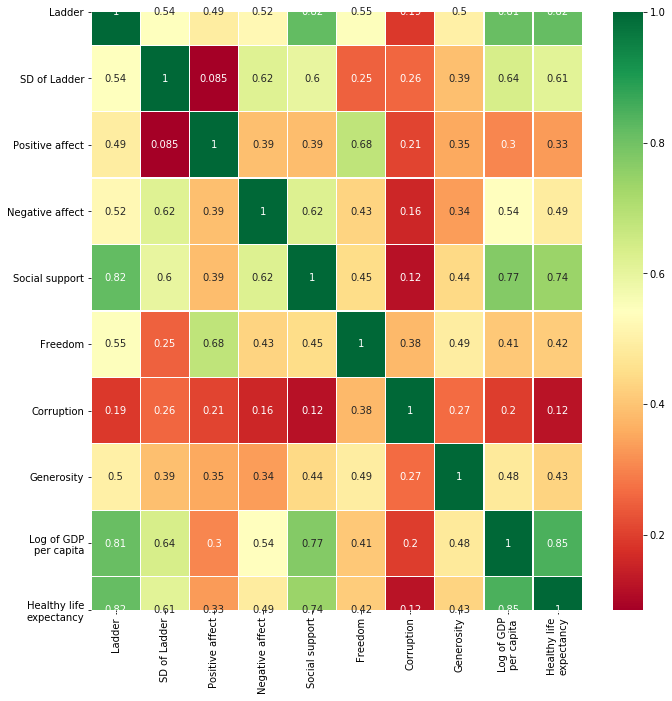

In [47]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(11,11)
plt.show()


In [ ]:
Из таблицы видим достаточно сильную линейную зависимость между Ladder:
    и Log of GDP\nper capita (0,81)
    и Healthy life\nexpectancy (0,82)
    и Social support (0,82)

Загрузить таблицу цен на авокадо: 

In [128]:
import io
import requests
url_2="http://yustiks.ru/avocado.csv"
df_2=pd.read_csv(url_2)
df_2[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

In [131]:
# для начало проверим есть ли значнения NaN
df_2[df_2['AveragePrice'].isnull()]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


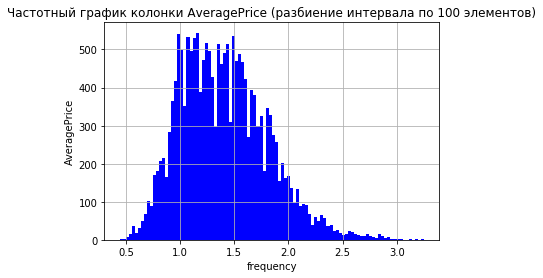

In [132]:
n, bins, patches = plt.hist(df_2['AveragePrice'], 100, facecolor='b') 
plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график колонки AveragePrice (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()


In [82]:
print('Значение моды: ', statistics.mode(df_2['AveragePrice']))

Значение моды:  1.15


In [83]:
print('Медиана: ', statistics.median(df_2['AveragePrice']))

Медиана:  1.37


In [84]:

print(f"среднее арифметическое - {statistics.mean(df_2['AveragePrice']):.2f}")


среднее арифметическое - 1.41


In [85]:
# Я думаю, что это асемметричное  распределение с левосторонней ассиметрией.
# При нормальном распределение мода, среднеее арифметическое и медианы должны быть равны(максимально совпадать)

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

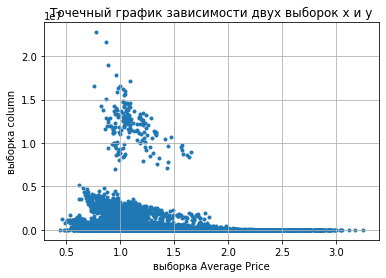

In [138]:
column = df_2['AveragePrice']
price = df_2['4046']
plt.xlabel('выборка Average Price')
plt.ylabel('выборка column')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(column, price, marker='.')

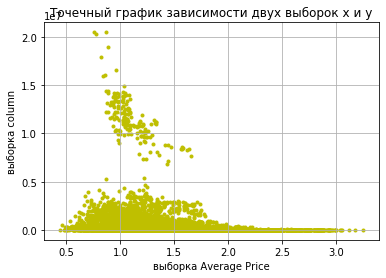

In [143]:
column = df_2['AveragePrice']
price = df_2['4225']
plt.xlabel('выборка Average Price')
plt.ylabel('выборка column')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(column, price, marker='.', c ='y')

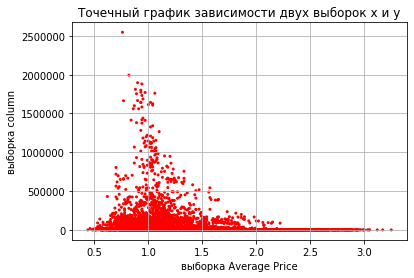

In [142]:
column = df_2['AveragePrice']
price = df_2['4770']
plt.xlabel('выборка Average Price')
plt.ylabel('выборка column')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(column, price, marker='.', c='r', alpha= 1, edgecolors='none')

In [ ]:
На всех трех графиках мы видим обратную корреляцию - чем выше средняя цена тем ниже показатели столбцов.